# SPAM Benchmarks, Analysis

In [3]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Plot

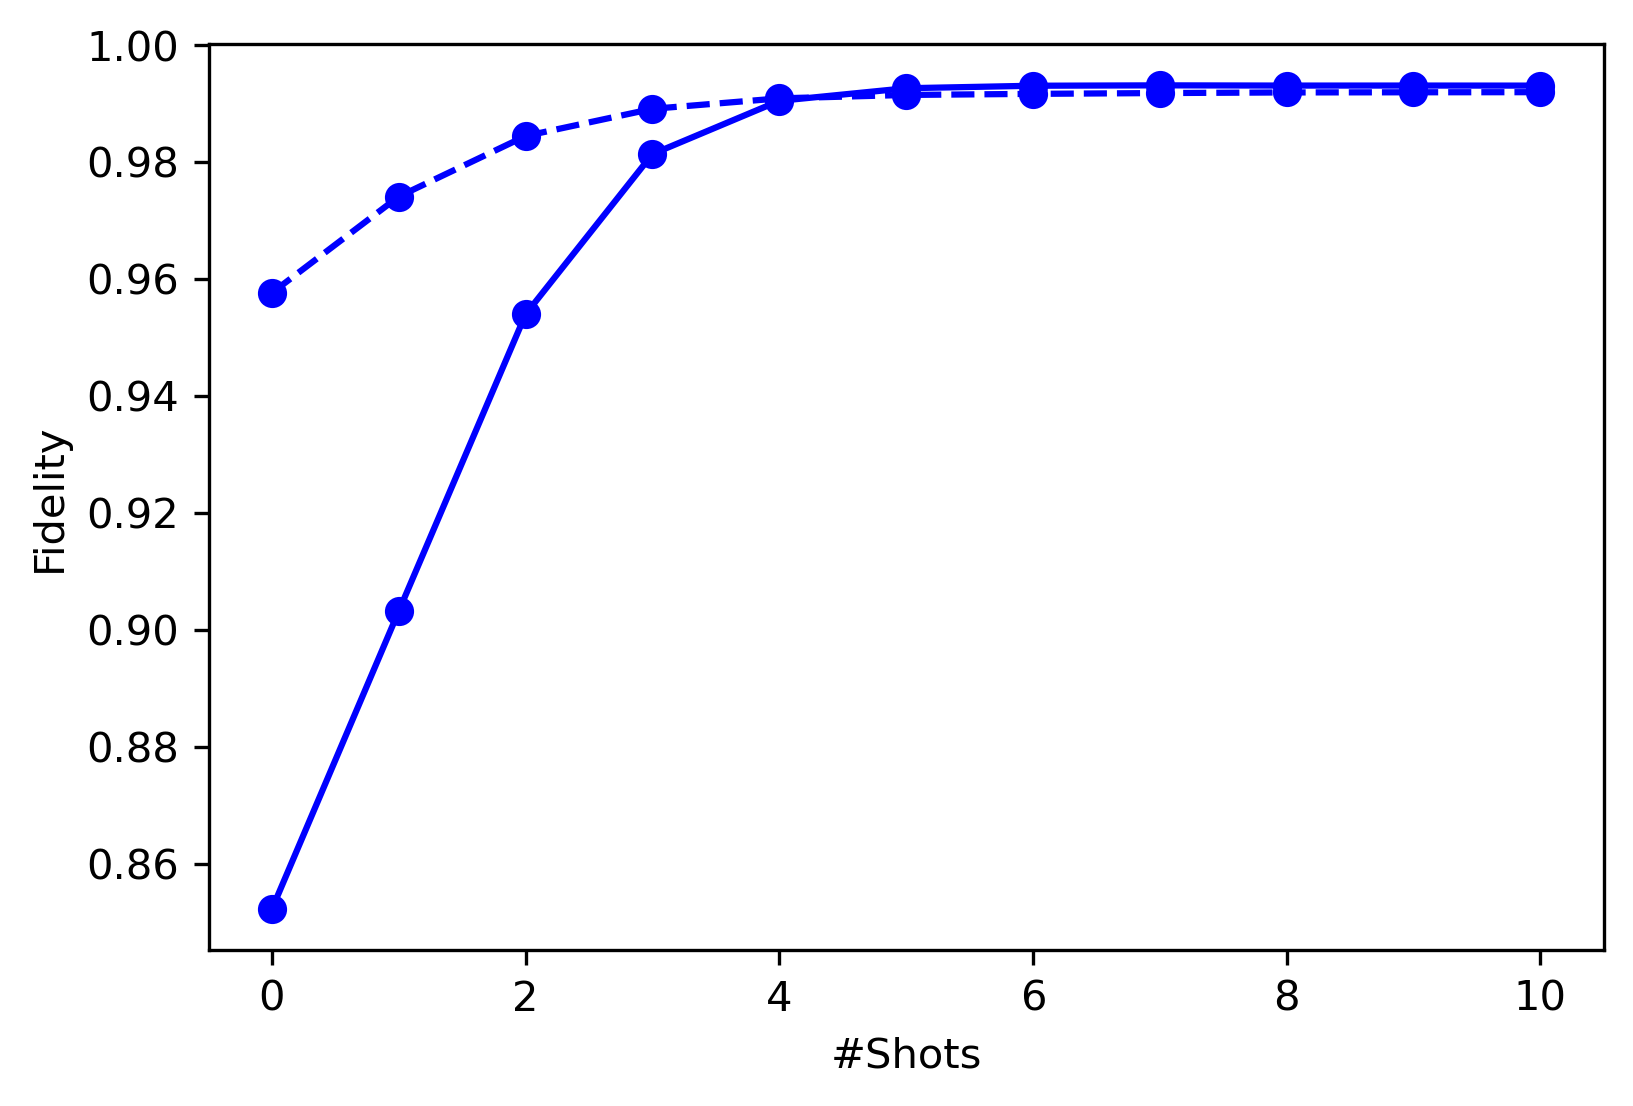

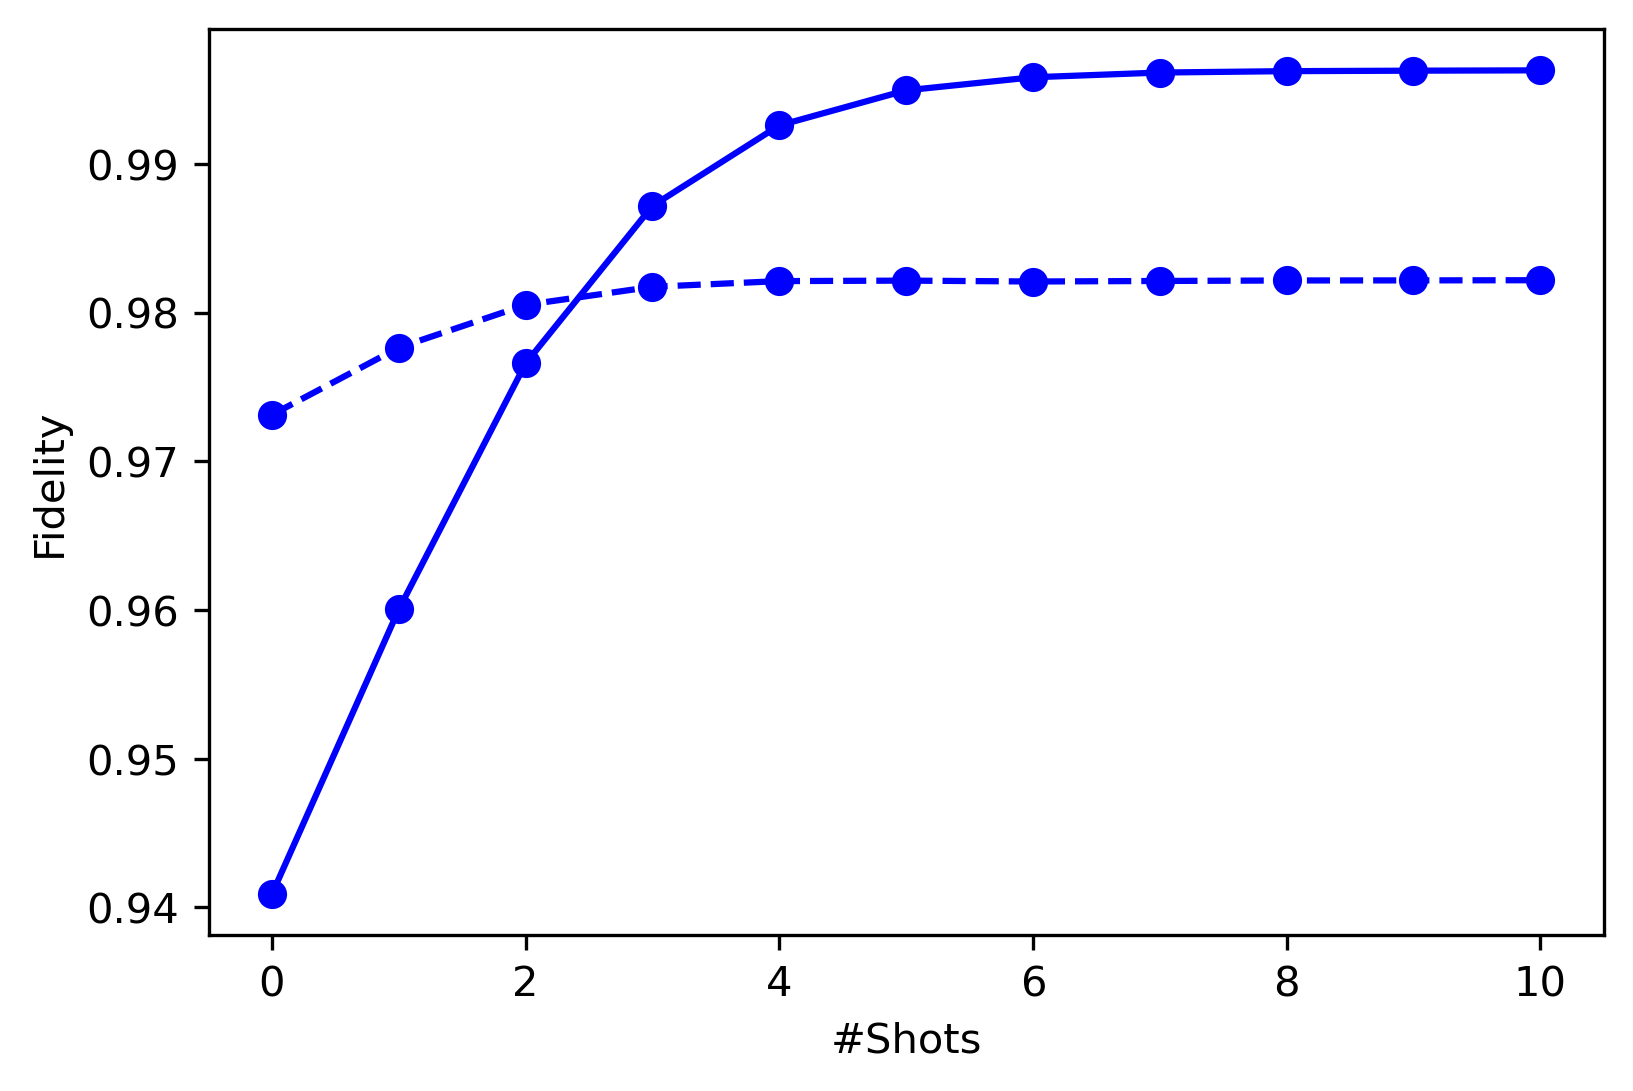

In [8]:
noise_list = np.logspace(-1, -3, 10)
noise_list = np.append(noise_list, 0)

init_fid_list1, povm_fid_list1 = loader(data_path("spam_fidelity_3qubit_full.data"))
init_fid_list2, povm_fid_list2 = loader(data_path("spam_fidelity_3qubit_corr.data"))
#init_fid_list4, povm_fid_list4 = loader(data_path("spam_fidelity_4qubit_full.data"))


init_fid_mean1 = np.mean(init_fid_list1, axis=1)
povm_fid_mean1 = np.mean(povm_fid_list1, axis=1)

init_fid_mean2 = np.mean(init_fid_list2, axis=1)
povm_fid_mean2 = np.mean(povm_fid_list2, axis=1)

#init_fid_mean4 = np.mean(init_fid_list4, axis=1)
#povm_fid_mean4 = np.mean(povm_fid_list4, axis=1)

x_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.plot(x_list, init_fid_mean1, "bo-")
plt.plot(x_list, init_fid_mean2, "bo--")

#plt.plot(x_list, init_fid_mean4, "ro-")
#plt.plot(x_list, init_fid_mean2, "bo--")


ticks_list = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
labels = ["$10^2$", "$7.4 x 10^2$", "$6.0 x 10^3$","$\infty$"]

#plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("Fidelity")
plt.show()

fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")
plt.plot(x_list, povm_fid_mean1, "bo-")
plt.plot(x_list, povm_fid_mean2, "bo--")


#plt.xticks(ticks_list, labels)
plt.xlabel("#Shots")
plt.ylabel("Fidelity")
plt.show()